In [ ]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import numpy as np

In [ ]:
# Unzips the zip file
!unzip spectrogram_data.zip -d spectrogram_data

In [ ]:
# Creating train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    "spectrogram_data/train",
    labels='inferred',
    label_mode='int',
    class_names=['0','1','2','3','4','5','6','7','8','9'],
    batch_size=32,
    image_size=(32, 32),
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True
)

# Creating train dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  "spectrogram_data/val",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(32, 32),
  batch_size=32)

Found 6985 files belonging to 10 classes.
Using 5588 files for training.
Found 1747 files belonging to 10 classes.
Using 349 files for validation.


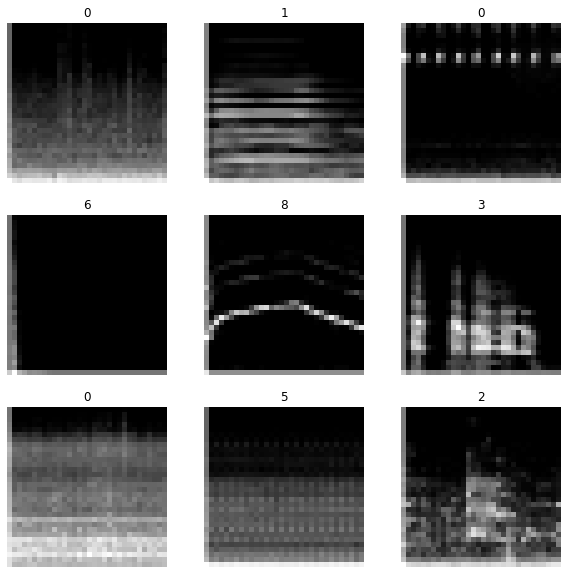

In [ ]:
# Example of the data
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 32, 32, 3)
(32,)


In [ ]:
# CNN Model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


history = model.fit(train_ds,epochs=25, 
                    validation_data=val_ds)

Epoch 1/25
103/175 [================>.............] - ETA: 4s - loss: 0.1749 - accuracy: 0.9414

In [ ]:
# Plotting loss
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Plotting accuracy
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()